<font size=5> **Imports and loading data**

<font size=4>**_Install Tensorflow, Keras, Opencv to run this code_**

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation
import cv2

#load data
train_data=sio.loadmat('train_32x32.mat')
test_data=sio.loadmat('test_32x32.mat')
extra = sio.loadmat('extra_32x32.mat')

x_train=train_data['X']
y_train=train_data['y']
x_test=test_data['X']
y_test=test_data['y']

Using TensorFlow backend.


<font size=5> **Some sanity checks and EDA**

array([7], dtype=uint8)

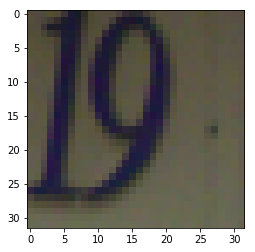

In [23]:
extra_x = extra['X']
extra_y = extra['y']
plt.imshow(x_train[:,:,:,1])
extra_y[1]

In [3]:
x_train.shape

(32, 32, 3, 73257)

In [4]:
x_test.shape

(32, 32, 3, 26032)

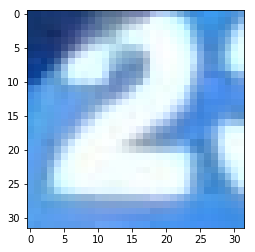

In [5]:
plt.imshow(x_train[:,:,:,2])

<font size=5> **_Important decision we need to make- Should we convert the images to grayscale or not??_**

<font size=4> **If we did want to here is the code**

In [6]:
x_gray_train=np.empty_like(x_train[:,:,0,:])
x_gray_test=np.empty_like(x_test[:,:,0,:])

In [7]:
for i in range(x_train.shape[3]):
    x_gray_train[:,:,i]=cv2.cvtColor(x_train[:,:,:,i], cv2.COLOR_RGB2GRAY)
    
for i in range(x_test.shape[3]):
    x_gray_test[:,:,i]=cv2.cvtColor(x_test[:,:,:,i], cv2.COLOR_RGB2GRAY)

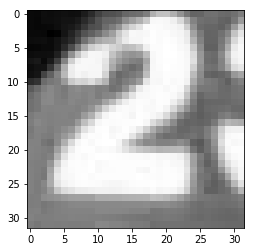

In [8]:
plt.imshow(x_gray_train[:,:,2],cmap="gray")

In [9]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [10]:
#reshape data to fit model
x_train = x_gray_train.transpose((2,0,1))
x_test = x_gray_test.transpose((2,0,1))

In [11]:
x_train.shape

(73257, 32, 32)

In [12]:
x_test.shape

(26032, 32, 32)

In [13]:
x_train=x_train.reshape(73257, 32, 32,1)
x_test=x_test.reshape(26032, 32, 32,1)

In [14]:
np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [15]:
ind=np.where(y_train==10)

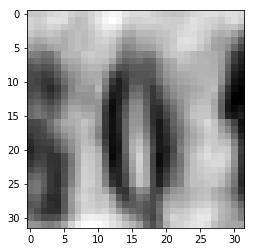

In [16]:
plt.imshow(x_train[ind[0][0],:,:,0],cmap="gray")

<font size=4> **Zero has been labeled as 10**

In [17]:
y_train[y_train==10]=0
y_test[y_test==10]=0

<font size=3> **Reshape the data to be in the format Keras expects**

<font size=4>**Split into training and validation 75-25**

In [18]:
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.25, random_state=7)

Text(0.5, 0, 'Labels')

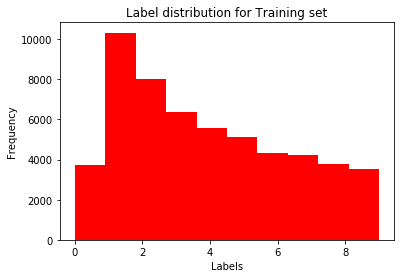

In [19]:
plt.hist(y_train,bins=10,color="red")
plt.title("Label distribution for Training set")
plt.ylabel("Frequency")
plt.xlabel("Labels")

Text(0.5, 0, 'Labels')

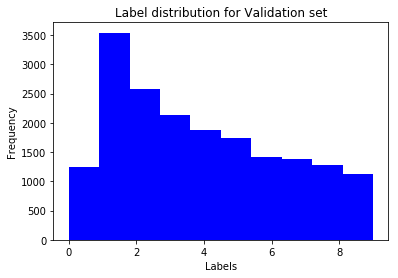

In [ ]:
plt.hist(y_val,bins=10,color="blue")
plt.title("Label distribution for Validation set")
plt.ylabel("Frequency")
plt.xlabel("Labels")

Text(0.5, 0, 'Labels')

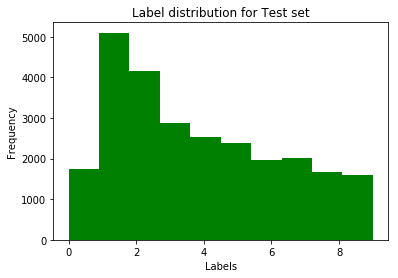

In [ ]:
plt.hist(y_test,bins=10,color="green")
plt.title("Label distribution for Test set")
plt.ylabel("Frequency")
plt.xlabel("Labels")

<font size=3> **Convert labels 1-10 to one-hot encoding**

In [ ]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
y_train[2]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

<font size=4>**Normalization**

In [ ]:
x_train_mean=np.mean(x_train, axis=0)
x_train_sd=np.std(x_train,axis=0)

x_train_norm=(x_train-x_train_mean)/x_train_sd
x_val_norm=(x_val-x_train_mean)/x_train_sd
x_test_norm=(x_test-x_train_mean)/x_train_sd

In [ ]:
model = Sequential()

In [ ]:
#add model layers
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(32,32,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation(tf.nn.softmax))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train_norm, y_train, validation_data=(x_val_norm, y_val), epochs=1)

Train on 54942 samples, validate on 18315 samples
Epoch 1/1
